Steven Rutledge ECE 570

This is my Discrete Social Recommendation Implementation.
This supplements the paper and was created to run and display the Filmtrust Dataset.

Connect To Google Drive to access dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create Dataframe from ratings and trust matrices

In [3]:
import pandas as pd
ratings = pd.read_csv('ADD YOUR RATINGS MATRIX', sep=" ", header=None)
trust = pd.read_csv('ADD YOUR TRUST MATRIX', sep=" ", header=None)

Format Matrices by user and ratings ids

In [4]:
# print(ratings)
user_id = ratings[0]
item_id = ratings[1]
rating_value = ratings[2]
# print(trust)
trustor_id = trust[0]
# print(trust[0])
trustee_id = trust[1]
# print(trust[1])
trust_value = trust[2]
# print(trust[2])
ratingsDF = pd.DataFrame(list(zip(user_id, item_id, rating_value)),
               columns =['User ID', 'Item ID', 'Rating'])
trustDF = pd.DataFrame(list(zip(trustor_id, trustee_id, trust_value)),
               columns =['Trustor ID', 'Trustee ID', 'Trust'])
# print(ratingsDF)
# print(trustDF)
# print(min(ratings[2]))

Factor Matrices -- Factoring based off code found on https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b

In [5]:
import numpy


def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
  Q = Q.T
  for step in range(steps):
      # xx: update the P and Q
      for i in range(len(R)):
          for j in range(len(R[i])):
              if R[i][j] > 0:
                  eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                  for k in range(K):
                      P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                      Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
      # xx: calculate the error
      eR = numpy.dot(P,Q)
      e = 0
      for i in range(len(R)):
          for j in range(len(R[i])):
              if R[i][j] > 0:
                  e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                  for k in range(K):
                      e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
      # xx: termination condition
      if e < 0.001:
          break
  return P, Q.T

In [6]:
# print((ratingsDF.iloc[0:100]).to_numpy())

Chop Ratings Matrices to "200" entires for computing power then factor into latent space

In [7]:


R = (ratingsDF.iloc[0:200]).to_numpy()
# print(R)
# N: num of User
# for x in R:
N = len(R)
# M: num of Movie
M = len(R[0])
# Num of Features
K = 2
# for x in R:
#   for y in x:
#     print(type(y))
 
P = numpy.random.rand(N,K)
Q = numpy.random.rand(M,K)


nP, nQ = matrix_factorization(R, P, Q, K)
# print(nP.shape)
# print(nQ.T.shape)
decompR = numpy.dot(nP, nQ.T)
# print(decompR)
# print(R)

Re-intialize factorization for different steps and alpha/beta coefficients

In [8]:
import numpy


def matrix_factorization(R, P, Q, K, steps=200, alpha=0.00002, beta=0.002):
  Q = Q.T
  for step in range(steps):
      # xx: update the P and Q
      for i in range(len(R)):
          for j in range(len(R[i])):
              if R[i][j] > 0:
                  eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                  for k in range(K):
                      P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                      Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
      # xx: calculate the error
      eR = numpy.dot(P,Q)
      e = 0
      for i in range(len(R)):
          for j in range(len(R[i])):
              if R[i][j] > 0:
                  e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                  for k in range(K):
                      e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
      # xx: termination condition
      if e < 0.001:
          break
  return P, Q.T

Decompose Trust Matrix into latent space

In [9]:
S = (trustDF.astype(float).iloc[0:200]).to_numpy()
# print(S)
# N: num of User
# for x in R:
N = len(S)
# M: num of Movie
M = len(S[0])
# Num of Features
K = 2

 
P = numpy.random.rand(N,K)
T = numpy.random.rand(M,K)


nP, nT = matrix_factorization(S, P, T, K)
# print(nP)
# print(nT)
decompS = numpy.dot(nP, nT.T)
print(decompS)
print(S)

[[2.00207078e+00 9.65992776e+02 8.07778116e-01]
 [2.00051699e+00 1.04000002e+02 8.76083523e-02]
 [5.00301260e+00 1.50898832e+03 1.26251391e+00]
 [6.00243981e+00 1.19199094e+03 9.98031508e-01]
 [7.00301631e+00 1.50998831e+03 1.26406865e+00]
 [1.20006095e+01 2.33998924e+02 1.99814963e-01]
 [1.50013349e+01 6.51995468e+02 5.50117755e-01]
 [1.50017629e+01 8.82993579e+02 7.43109928e-01]
 [1.50029282e+01 1.51098842e+03 1.26778127e+00]
 [1.50029494e+01 1.51198840e+03 1.26861673e+00]
 [1.50024573e+01 1.23899064e+03 1.04053508e+00]
 [1.60006881e+01 3.00998391e+02 2.57229589e-01]
 [1.60010802e+01 5.08996694e+02 4.31006097e-01]
 [1.80023249e+01 1.18499118e+03 9.96499011e-01]
 [2.00027887e+01 1.44098910e+03 1.21109706e+00]
 [2.00023184e+01 1.18499119e+03 9.97218286e-01]
 [2.60022280e+01 1.17899125e+03 9.94363303e-01]
 [2.60000934e+01 6.00003918e+01 5.94791113e-02]
 [2.70028632e+01 1.51298860e+03 1.27376797e+00]
 [2.70001089e+01 7.40002798e+01 7.15352412e-02]
 [2.70028847e+01 1.51398863e+03 1.274603

Find Squared Loss between ratings/trust and dot product of their corrisponding latent vectors
The dot product of latent vectors represents the process of our competing algorithm without binary 

In [10]:
import numpy as np
difference_arrayR = np.subtract(R, decompR)
squared_arrayR = np.square(difference_arrayR)
# print(squared_array)
diffSumR = sum(squared_arrayR)

print('Item Ratings')
print('The Calculated Squared Loss of each column for matrix R and P.T*Q are', diffSumR)
# mseR = squared_arrayR.mean()
mseR = sum(diffSumR)
print('The total Squared Loss of matrix R and P.T*Q is' , mseR)

print('')
difference_arrayS = np.subtract(S, decompS)
squared_arrayS = np.square(difference_arrayS)
# print(squared_array)
diffSumS = sum(squared_arrayS)
print('Trust Ratings')
print('The Calculated Squared Loss of each column for matrix S and P.T*T are', diffSumS)
mseS = sum(diffSumS)
print('The total Squared Loss of matrix S and P.T*T is' , mseS)

Item Ratings
The Calculated Squared Loss of each column for matrix R and P.T*Q are [9.76099154e+01 4.11489491e-02 4.05429851e+01]
The total Squared Loss of matrix R and P.T*Q is 138.1940494906134

Trust Ratings
The Calculated Squared Loss of each column for matrix S and P.T*T are [6.64412819e-03 5.92489411e-03 4.76211013e+01]
The total Squared Loss of matrix S and P.T*T is 47.63367031664864


Plot differences between ratings and estimated ratings to understand and visualize loss

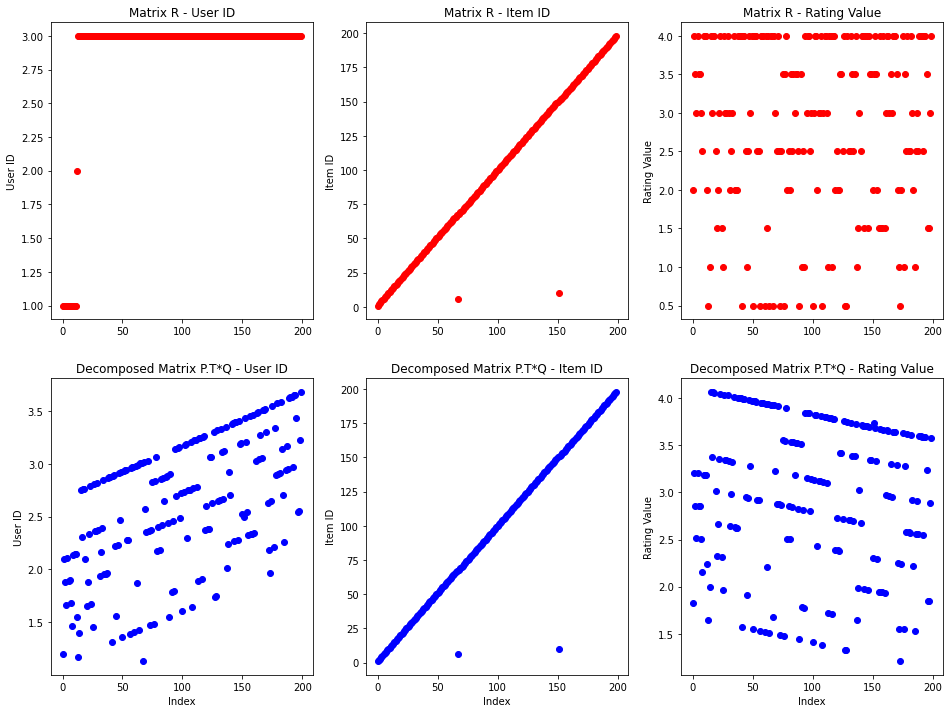

In [11]:
import matplotlib.pyplot as plt

# plt.scatter(S[:,2], decompS[:,2])
# plt.colorbar()
# plt.show()

fig,ax = plt.subplots(2,3)
fig.set_size_inches(16,12)
# fig.title.set_text('Test')
ax[0,0].title.set_text('Matrix R - User ID')
ax[0,1].title.set_text('Matrix R - Item ID')
ax[0,2].title.set_text('Matrix R - Rating Value')
ax[1,0].title.set_text('Decomposed Matrix P.T*Q - User ID')
ax[1,1].title.set_text('Decomposed Matrix P.T*Q - Item ID')
ax[1,2].title.set_text('Decomposed Matrix P.T*Q - Rating Value')
ax[0,0].set_ylabel('User ID')
ax[0,1].set_ylabel('Item ID')
ax[0,2].set_ylabel('Rating Value')
ax[1,0].set_ylabel('User ID')
ax[1,1].set_ylabel('Item ID')
ax[1,2].set_ylabel('Rating Value')


for idx in range(3):
  ax[0,idx].plot(R[:,idx], 'ro')
  ax[1,idx].plot(decompR[:,idx], 'bo')
  # print(decompR[:,idx])
  # ax[0,idx].set_xlabel('Index')
  ax[1,idx].set_xlabel('Index')
  
fig.show()

Visualize Trust original vs Trust latent vectors

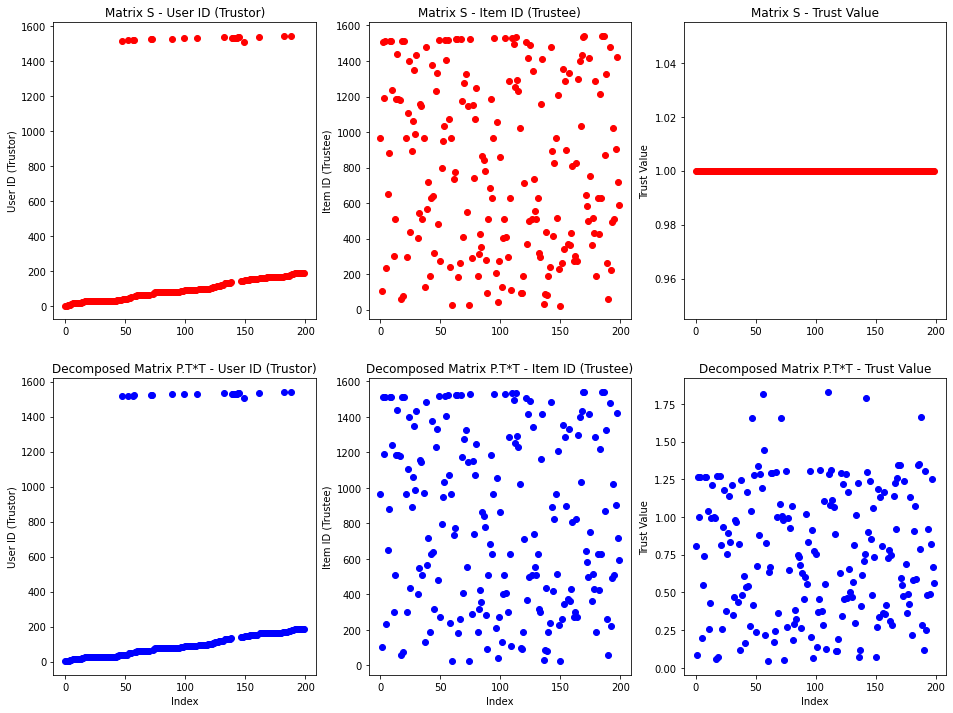

In [12]:
fig,ax = plt.subplots(2,3)
fig.set_size_inches(16,12)
ax[0,0].title.set_text('Matrix S - User ID (Trustor)')
ax[0,1].title.set_text('Matrix S - Item ID (Trustee)')
ax[0,2].title.set_text('Matrix S - Trust Value')
ax[1,0].title.set_text('Decomposed Matrix P.T*T - User ID (Trustor)')
ax[1,1].title.set_text('Decomposed Matrix P.T*T - Item ID (Trustee)')
ax[1,2].title.set_text('Decomposed Matrix P.T*T - Trust Value')
ax[0,0].set_ylabel('User ID (Trustor)')
ax[0,1].set_ylabel('Item ID (Trustee)')
ax[0,2].set_ylabel('Trust Value')
ax[1,0].set_ylabel('User ID (Trustor)')
ax[1,1].set_ylabel('Item ID (Trustee)')
ax[1,2].set_ylabel('Trust Value')


for idx in range(3):
  ax[0,idx].plot(S[:,idx], 'ro')
  ax[1,idx].plot(decompS[:,idx], 'bo')
  # ax[0,idx].set_xlabel('Index')
  ax[1,idx].set_xlabel('Index')
  
fig.show()

Hamming distance function

In [13]:
# Hamming Distance H(b,d), where 0 is all bits different, len if all the same
import hashlib
def hamming_distance(matrix1, matrix2):
    return sum(c1 == c2 for c1, c2 in zip(matrix1, matrix2))


Dot product approximation throught 2*hamming_distance(a,b) - len(binary_string)

In [14]:
# bd = 2H(b,d)-r
def dsrHamming(in1, in2):
  matrix1 = hashlib.md5("matrix1".encode()).hexdigest()
  matrix2 = hashlib.md5("matrix2".encode()).hexdigest()

  matrix1 = in1
  matrix2 = in2

  assert len(matrix1) == len(matrix2)

  hamming = hamming_distance(matrix1, matrix2)

  # dot product b.d can be expressed as bd =2H(b,d)−r 
  # print(hamming)
  dbDot = 2 * hamming - len(matrix1)
  # print(dbDot)
  
  return(dbDot)

Convert float to binary string

In [15]:
# Convert 32 bit float to binary string
import struct
def binary(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

Testing Functionality and estimates

In [16]:
# Test binary hamming
a = binary(8.1)
print(a)
b = binary(1.2)
print(b)
print(dsrHamming(a,b))

01000001000000011001100110011010
00111111100110011001100110011010
14


Checking compatable size

In [17]:
# Size check
print(R.shape)
print(nP.shape)
print(nQ.shape)

(200, 3)
(200, 2)
(3, 2)


Execute DSR Objective Function
1. Convert floats of latent vectors values to binary strings
2. Find hamming distance between user and item
3. Using hamming to approximate dot product
4. Find error between original values and dot product estimation

In [18]:
# Sum all i,j { (Rij-bi.dj)^2 } + a0 * Sum all i,k { (Rij-bi.fk)^2 }
count = 0
sumDsrR = 0
squaredDsrR = 0
diffListR = []

print(R.shape)
print(nP.shape)
print(nQ.shape)
for j in range(len(R[0])-1):
  for i in range(len(R)-1):
    # print(R[i][j])
    # print(dsrHamming(binary(nP[i]),binary(nQ[j])))
    # print(R[i][j])
    # print(nP[i][0])
    # print(nQ[j][0])
    diffListR.append((R[i][j] - dsrHamming(binary(float(nP[i][0])),binary(float(nQ[j][0])))))
    sumDsrR += ((R[i][j] - dsrHamming(binary(float(nP[i][0])),binary(float(nQ[j][0])))))
  #   count+=1
  # if(count > 3):
  #   break
print(sumDsrR)
squaredDsrR = sumDsrR ** 2
print(squaredDsrR)
print('User Ratings')
print('The total Squared Loss of matrix R and b.d is' , squaredDsrR)

(200, 3)
(200, 2)
(3, 2)
19781.0
391287961.0
User Ratings
The total Squared Loss of matrix R and b.d is 391287961.0


Visualize error by item index

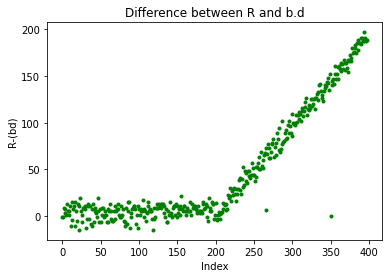

In [19]:
plt.plot(diffListR, 'g.')
plt.title('Difference between R and b.d')
plt.ylabel('R-(bd)')
plt.xlabel('Index')
plt.show()

Create lists to later view loss from hamming approximations

In [20]:
bd0 = []
bd1 = []
bd2 = []
# print(len(R))
print(nQ.shape)
for i in range(len(R)):
  bd0.append(dsrHamming(binary(nP[i][0]),binary(nQ[0][0])))
  bd1.append(dsrHamming(binary(nP[i][0]),binary(nQ[1][0])))
  bd2.append(dsrHamming(binary(nP[i][0]),binary(nQ[2][0])))

(3, 2)


Normalize values to a range of [-32,32]
-Hamming estimation provides an estimate based on a 32 character binary string and we need to adjust original values to the same range for accurate comparison

In [21]:
def norm32(oM):
  minR = min(oM)
  maxR = max(oM)
  norm = []
  for x in oM:
    temp = (x - minR)/(maxR - minR)
    norm.append(temp)
  avg = np.mean(norm)
  # print(avg)
  norm = 32*(norm - avg)
  return(norm)

In [22]:
normOR0 = norm32(R[:,0])
normOR1 = norm32(R[:,1])
normOR2 = norm32(R[:,2])

Graph DSR Loss - Adjusted Original Values vs approximated hamming dot product

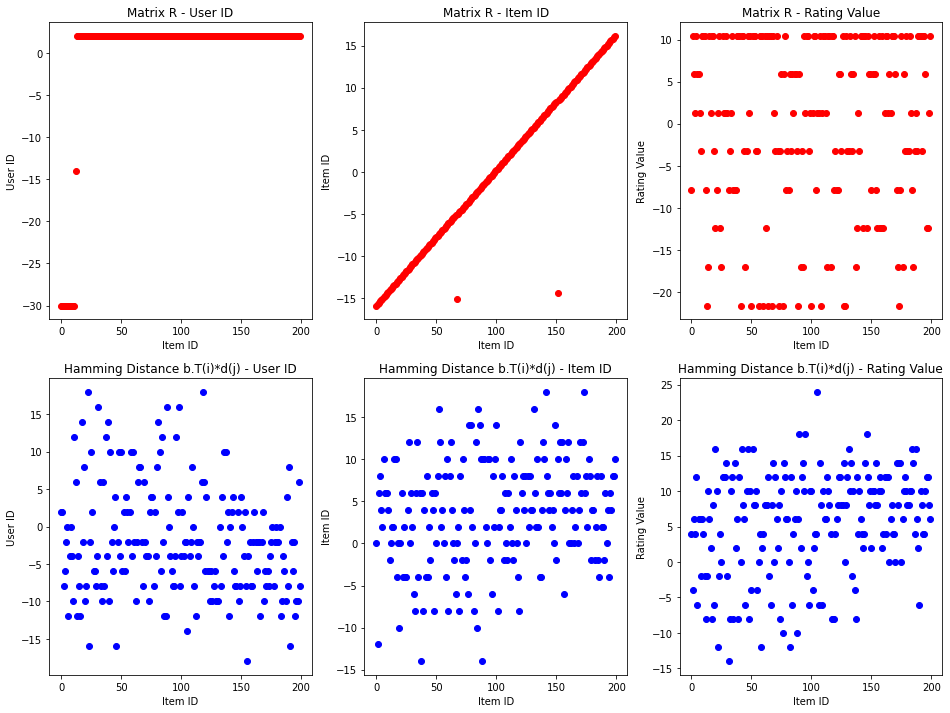

In [23]:
fig,ax = plt.subplots(2,3)
fig.set_size_inches(16,12)

ax[0,0].title.set_text('Matrix R - User ID')
ax[0,1].title.set_text('Matrix R - Item ID')
ax[0,2].title.set_text('Matrix R - Rating Value')
ax[1,0].title.set_text('Hamming Distance b.T(i)*d(j) - User ID')
ax[1,1].title.set_text('Hamming Distance b.T(i)*d(j) - Item ID')
ax[1,2].title.set_text('Hamming Distance b.T(i)*d(j) - Rating Value')
ax[0,0].set_ylabel('User ID')
ax[0,1].set_ylabel('Item ID')
ax[0,2].set_ylabel('Rating Value')
ax[1,0].set_ylabel('User ID')
ax[1,1].set_ylabel('Item ID')
ax[1,2].set_ylabel('Rating Value')

for idx in range(3):
  ax[0,idx].set_xlabel('Item ID')
  ax[1,idx].set_xlabel('Item ID')

ax[0,0].plot(normOR0, 'ro')
ax[0,1].plot(normOR1, 'ro')
ax[0,2].plot(normOR2, 'ro')
ax[1,0].plot((bd0), 'bo')
ax[1,1].plot((bd1), 'bo')
ax[1,2].plot((bd2), 'bo')
# ax[1,1].plot(decompS[:,idx], 'bo')
# ax[1,2].plot(decompS[:,idx], 'bo')

fig.show()

Graph competitors algorithm with dot product vs DSR dot product approximation

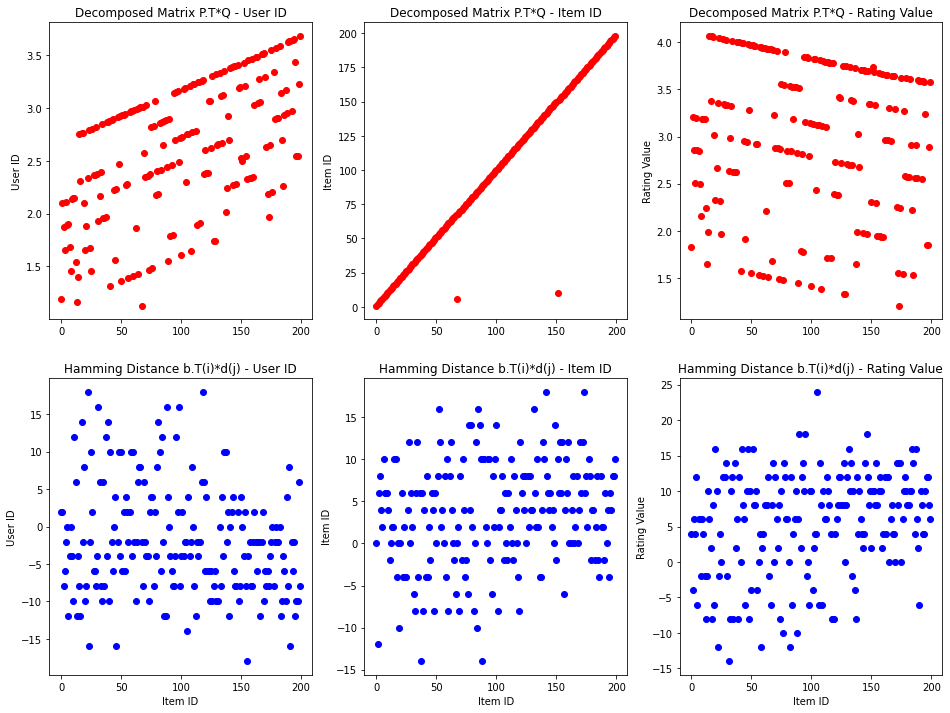

In [24]:
fig,ax = plt.subplots(2,3)
fig.set_size_inches(16,12)
ax[0,0].title.set_text('Decomposed Matrix P.T*Q - User ID')
ax[0,1].title.set_text('Decomposed Matrix P.T*Q - Item ID')
ax[0,2].title.set_text('Decomposed Matrix P.T*Q - Rating Value')
ax[1,0].title.set_text('Hamming Distance b.T(i)*d(j) - User ID')
ax[1,1].title.set_text('Hamming Distance b.T(i)*d(j) - Item ID')
ax[1,2].title.set_text('Hamming Distance b.T(i)*d(j) - Rating Value')
ax[0,0].set_ylabel('User ID')
ax[0,1].set_ylabel('Item ID')
ax[0,2].set_ylabel('Rating Value')
ax[1,0].set_ylabel('User ID')
ax[1,1].set_ylabel('Item ID')
ax[1,2].set_ylabel('Rating Value')

for idx in range(3):
  ax[0,idx].plot(decompR[:,idx], 'ro')
  
  # ax[0,idx].set_xlabel('Index')
  ax[1,idx].set_xlabel('Item ID')
  
ax[1,0].plot((bd0), 'bo')
ax[1,1].plot((bd1), 'bo')
ax[1,2].plot((bd2), 'bo')
# ax[1,1].plot(decompS[:,idx], 'bo')
# ax[1,2].plot(decompS[:,idx], 'bo')

fig.show()

Calculate Squared Loss for any two lists or columns

In [25]:
def sqauredLoss(m1, m2):
  diff = 0
  sqSum = 0
  for ind, val in enumerate(m1):
    diff = m1[ind] - m2[ind]
    sqSum += diff**2
  return(sqSum)


Calculated adjusted Squared Loss between Original R and latent vectors b*d approximation

In [26]:
asjustedTotalLoss = sqauredLoss(normOR0, bd0)
asjustedTotalLoss += sqauredLoss(normOR1, bd1)
asjustedTotalLoss += sqauredLoss(normOR2, bd2)
print('The adjusted total loss between normalized matrix R and the hamming distance between b.T and d is', asjustedTotalLoss)

print(sqauredLoss(normOR0, bd0))
print(sqauredLoss(normOR1, bd1))
print(sqauredLoss(normOR2, bd2))

The adjusted total loss between normalized matrix R and the hamming distance between b.T and d is 85154.98321426599
23144.0
23743.260765286414
38267.72244897957


Normalize Trust Matrix S to [-32,32] range

In [27]:
from sklearn import preprocessing
# import numpy as np
normalized_arr = (preprocessing.normalize([decompR[:,2]]))
# print(normalized_arr)
minR = min(decompR[:,2])
maxR = max(decompR[:,2])
normR2 = []
for x in decompR[:,2]:
  temp = (x - minR)/(maxR - minR)
  normR2.append(temp)
avg = np.mean(normR2)
# print(avg)
normR2 = 32*(normR2 - avg)
# print(normR2)

In [28]:
minR = min(decompR[:,0])
maxR = max(decompR[:,0])
normR0 = []
for x in decompR[:,0]:
  temp = (x - minR)/(maxR - minR)
  normR0.append(temp)
avg = np.mean(normR0)
# print(avg)
normR0 = 32*(normR0 - avg)
# print(normR2)

In [29]:
minR = min(decompR[:,1])
maxR = max(decompR[:,1])
normR1 = []
for x in decompR[:,1]:
  temp = (x - minR)/(maxR - minR)
  normR1.append(temp)
avg = np.mean(normR1)
# print(avg)
normR1 = 32*(normR1 - avg)
# print(normR2)

Calculate Squared Lost for Trust Values

In [30]:
asjustedTotalLoss = sqauredLoss(normR0, bd0)
asjustedTotalLoss += sqauredLoss(normR1, bd1)
asjustedTotalLoss += sqauredLoss(normR2, bd2)
print('The adjusted total loss between normalized matrix R and the hamming distance between b.T and d is', asjustedTotalLoss)

print(sqauredLoss(normR0, bd0))
print(sqauredLoss(normR1, bd1))
print(sqauredLoss(normR2, bd2))

The adjusted total loss between normalized matrix R and the hamming distance between b.T and d is 83120.31936997468
26673.661145275204
23747.495691513126
32699.16253318635


Visualize Loss and rating values of Competitor dot product vs. our hamming 

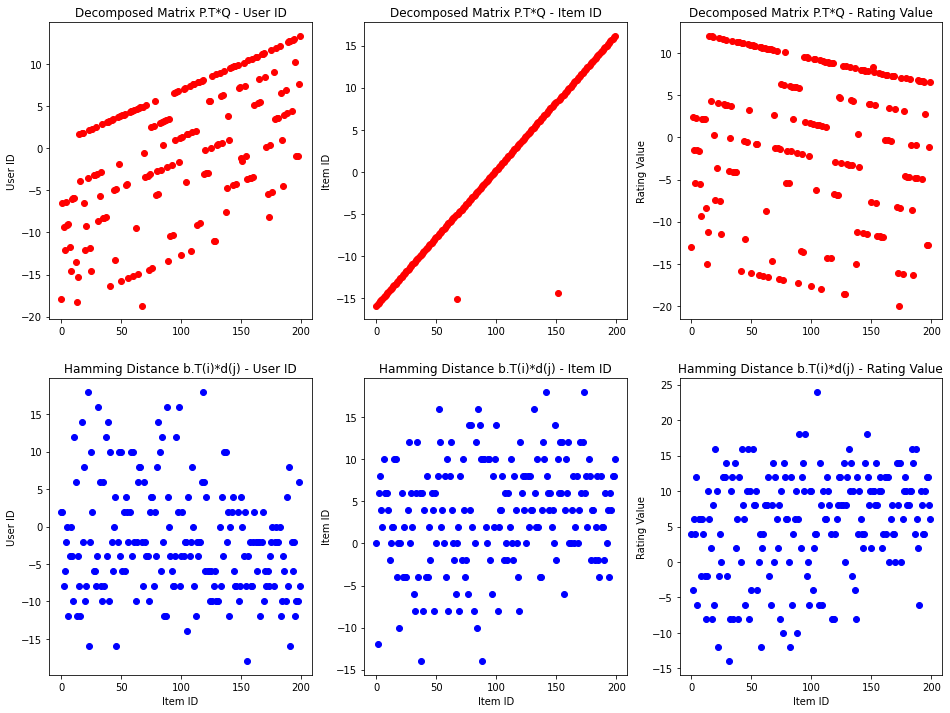

In [31]:
fig,ax = plt.subplots(2,3)
fig.set_size_inches(16,12)
ax[0,0].title.set_text('Decomposed Matrix P.T*Q - User ID')
ax[0,1].title.set_text('Decomposed Matrix P.T*Q - Item ID')
ax[0,2].title.set_text('Decomposed Matrix P.T*Q - Rating Value')
ax[1,0].title.set_text('Hamming Distance b.T(i)*d(j) - User ID')
ax[1,1].title.set_text('Hamming Distance b.T(i)*d(j) - Item ID')
ax[1,2].title.set_text('Hamming Distance b.T(i)*d(j) - Rating Value')
ax[0,0].set_ylabel('User ID')
ax[0,1].set_ylabel('Item ID')
ax[0,2].set_ylabel('Rating Value')
ax[1,0].set_ylabel('User ID')
ax[1,1].set_ylabel('Item ID')
ax[1,2].set_ylabel('Rating Value')

for idx in range(3):
  ax[1,idx].set_xlabel('Item ID')
ax[0,0].plot(normR0[:], 'ro')
ax[0,1].plot(normR1[:], 'ro')
ax[0,2].plot(normR2[:], 'ro')
  # ax[0,idx].set_xlabel('Index')

  
ax[1,0].plot((bd0), 'bo')
ax[1,1].plot((bd1), 'bo')
ax[1,2].plot((bd2), 'bo')
# ax[1,1].plot(decompS[:,idx], 'bo')
# ax[1,2].plot(decompS[:,idx], 'bo')

fig.show()

Items vs

In [32]:
# Test plot items vs Rating

# print(R[:,1].shape)
# plt.plot(R[:,1], bd2, 'bo')

# for x, y in enumerate(bd2):
#   if y >20:
#     print(R[x,1])

# plt.show()

Vuisualize ID different between R and user item (db) estimate

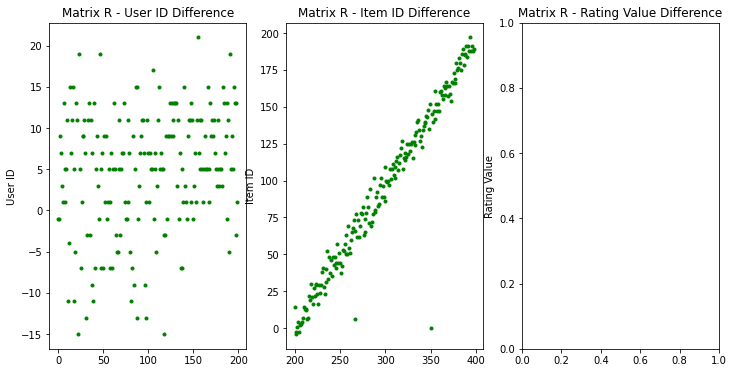

In [33]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

ax[0].title.set_text('Matrix R - User ID Difference')
ax[1].title.set_text('Matrix R - Item ID Difference')
ax[2].title.set_text('Matrix R - Rating Value Difference')
ax[0].set_ylabel('User ID')
ax[1].set_ylabel('Item ID')
ax[2].set_ylabel('Rating Value')

for count,val in enumerate(diffListR):
  if(count < len(R)):
    ax[0].plot(count, val, 'g.')
  elif(count < (2)* len(R)):
    ax[1].plot(count,val, 'g.')
  else:
    ax[2].plot(count,val, 'g.')
  
  # ax[0,idx].set_xlabel('Index')
  # ax[1,idx].set_xlabel('Index')


fig.show()

Calcualte Sqaured Loss Between Trust Values and Trust value hamming estimate

In [34]:
# Sum all i,j { (Rij-bi.dj)^2 } + a0 * Sum all i,k { (Rij-bi.fk)^2 }
countS = 0
sumDsrS = 0
squaredDsrS = 0
diffListS = []
for k in range(len(S[0])):
  for i in range(len(S)):
    # print(R[i][j])
    # print(dsrHamming(binary(nP[i]),binary(nQ[j])))
    diffListS.append((S[i][k] - dsrHamming(binary(nP[i][0]),binary(nT[k][0]))))
    sumDsrS += (S[i][k] - dsrHamming(binary(nP[i][0]),binary(nT[k][0])))
  #   count+=1
  # if(count > 3):
  #   break
print(sumDsrS)
squaredDsrS = sumDsrS ** 2
# print(squaredDsrS)

print('Trust Ratings')
print('The total Mean Squared Error of matrix S and b.f is' , squaredDsrS)

209172.0
Trust Ratings
The total Mean Squared Error of matrix S and b.f is 43752925584.0


Display Loss by item id

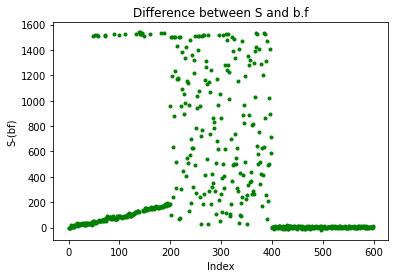

In [35]:
plt.plot(diffListS, 'g.')
plt.title('Difference between S and b.f')
plt.ylabel('S-(bf)')
plt.xlabel('Index')
plt.show()

Visualize Sqaured Loss Between Trust Values and Trust value hamming estimate

In [36]:
bf0 = []
bf1 = []
bf2 = []
for i in range(len(S)):
  bf0.append(dsrHamming(binary(nP[i][0]),binary(nT[0][0])))
  bf1.append(dsrHamming(binary(nP[i][0]),binary(nT[1][0])))
  bf2.append(dsrHamming(binary(nP[i][0]),binary(nT[2][0])))

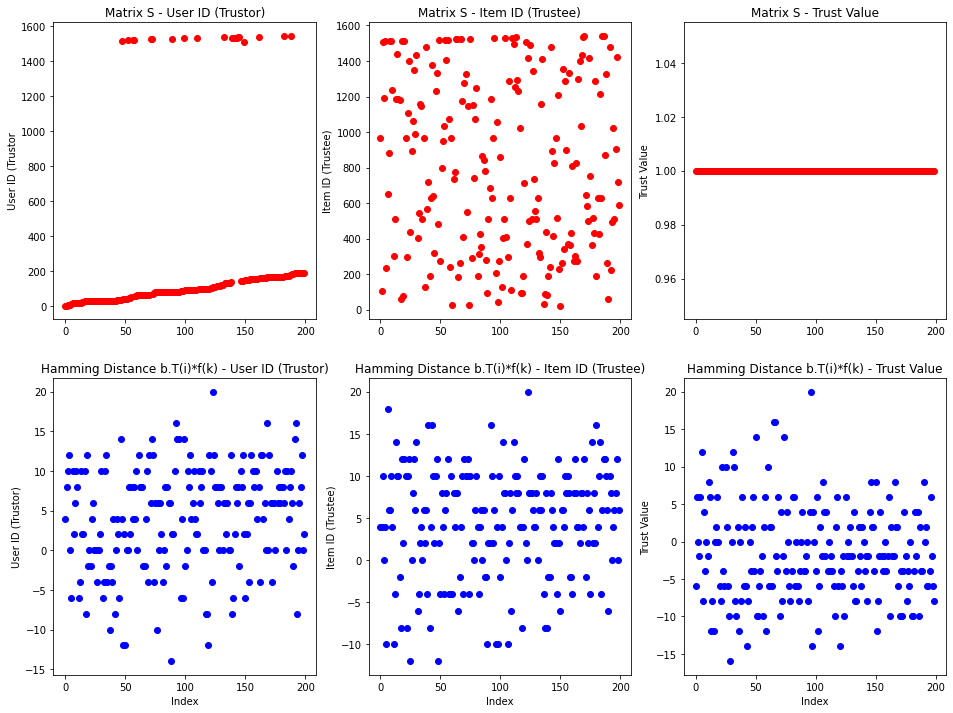

In [37]:
fig,ax = plt.subplots(2,3)
fig.set_size_inches(16,12)

ax[0,0].title.set_text('Matrix S - User ID (Trustor)')
ax[0,1].title.set_text('Matrix S - Item ID (Trustee)')
ax[0,2].title.set_text('Matrix S - Trust Value')
ax[1,0].title.set_text('Hamming Distance b.T(i)*f(k) - User ID (Trustor)')
ax[1,1].title.set_text('Hamming Distance b.T(i)*f(k) - Item ID (Trustee)')
ax[1,2].title.set_text('Hamming Distance b.T(i)*f(k) - Trust Value')
ax[0,0].set_ylabel('User ID (Trustor')
ax[0,1].set_ylabel('Item ID (Trustee)')
ax[0,2].set_ylabel('Trust Value')
ax[1,0].set_ylabel('User ID (Trustor)')
ax[1,1].set_ylabel('Item ID (Trustee)')
ax[1,2].set_ylabel('Trust Value')

for idx in range(3):
  ax[0,idx].plot(S[:,idx], 'ro')
  
  # ax[0,idx].set_xlabel('Index')
  ax[1,idx].set_xlabel('Index')

ax[1,0].plot((bf0), 'bo')
ax[1,1].plot((bf1), 'bo')
ax[1,2].plot((bf2), 'bo')
# ax[1,1].plot(decompS[:,idx], 'bo')
# ax[1,2].plot(decompS[:,idx], 'bo')

fig.show()

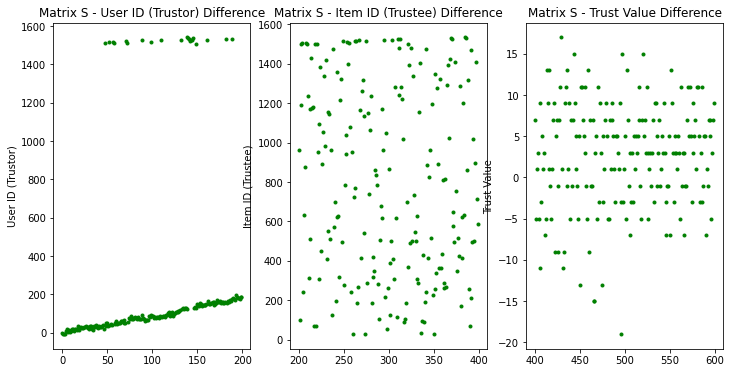

In [38]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,6)

ax[0].title.set_text('Matrix S - User ID (Trustor) Difference')
ax[1].title.set_text('Matrix S - Item ID (Trustee) Difference')
ax[2].title.set_text('Matrix S - Trust Value Difference')
ax[0].set_ylabel('User ID (Trustor)')
ax[1].set_ylabel('Item ID (Trustee)')
ax[2].set_ylabel('Trust Value')

for count,val in enumerate(diffListS):
  if(count < len(S)):
    ax[0].plot(count, val, 'g.')
  elif(count < (2)* len(S)):
    ax[1].plot(count,val, 'g.')
  else:
    ax[2].plot(count,val, 'g.')
  
  # ax[0,idx].set_xlabel('Index')
  # ax[1,idx].set_xlabel('Index')


fig.show()

Caluculate Dquared Loss of unoptimized DSR combined trust and ratings

In [39]:
print("Unoptimized DSR Equation Formation")
alpha0 = 0.5
DSR = squaredDsrR + alpha0 * squaredDsrS
print(DSR)

Unoptimized DSR Equation Formation
22267750753.0


Broken Optimization Attempt (Unused)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics

param = {}
param["a0"] = [10**-3, 10**2]
param["b1"] = [10**-5,1]
param["b2"] = [10**-5,1]
param["b3"] = [10**-4,1]
# print(param)
svc = svm.SVC();
bestParam = GridSearchCV(matrix_factorization, param_grid=param)
print(bestParam)

GridSearchCV(estimator=<function matrix_factorization at 0x7f2195f9e830>,
             param_grid={'a0': [0.001, 100], 'b1': [1e-05, 1], 'b2': [1e-05, 1],
                         'b3': [0.0001, 1]})


Invalid NDCG Test Attempts

In [41]:
# print("Evaluation using NDCG")
# from sklearn.metrics import ndcg_score
# # print(R[:,2])
# # print(bd2)

# y_order = []
# for y in np.asarray(R[:,1]):
#   y_order.append(y)
# # print(np.asarray([y_true]))

# y_true = []
# for y in np.asarray(R[:,2]):
#   y_true.append(y)
# # print(np.asarray([y_true]))
# y_score = []
# for y in np.asarray(bd2):
#   y_score.append(float(y))
# # print(np.asarray([y_score]))
# trueScoreR = ndcg_score(np.asarray([y_order]), np.asarray([y_true]))
# rankScoreR = ndcg_score(np.asarray([y_order]), np.asarray([y_score]))
# print("The NDCG Score between our true matrix R ratings column, and the original scores is", trueScoreR)
# print("The NDCG Score between our true matrix R ratings column, and the dot product of our binary decomposed matrices b and d is", rankScoreR)

In [42]:

# y_order = []
# for y in np.asarray(S[:,1]):
#   y_order.append(y)
# # print(np.asarray([y_true]))

# y_true = []
# for y in np.asarray(S[:,2]):
#   y_true.append(y)
# # print(np.asarray([y_true]))
# y_score = []
# for y in np.asarray(bf2):
#   y_score.append(float(y))
# # print(np.asarray([y_score]))
# trueScoreS = ndcg_score(np.asarray([y_order]), np.asarray([y_true]))
# rankScoreS = ndcg_score(np.asarray([y_order]), np.asarray([y_score]))
# print("The NDCG Score between our true matrix S Trustee, and the original trust value is", trueScoreS)
# print("The NDCG Score between our true matrix S Trustee, and the dot product of our binary decomposed matrices b and f is", rankScoreS)

In [43]:
# ndcg_score(np.asarray([normR2]), np.asarray([bd2]))
# # print(normR2)
# # print(bd2)
# print(ndcg_score(np.asarray([normR2]), np.asarray([bd2])))

NDCG Testing for different top K items for user
Original R vs. Competition
Original R vs. My DSR Approximation
Competition vs. My DSR Approximation

In [45]:
from sklearn.metrics import ndcg_score
topK = []
print(len(R[:,2]))
trueR = trueOrder = sorted(range(len(R[:,2])), key=lambda k: R[k,2], reverse=True)
compOrder = sorted(range(len(normR2)), key=lambda k: normR2[k], reverse=True)
estOrder = sorted(range(len(bd2)), key=lambda k: bd2[k], reverse=True)
print(trueR)
print(compOrder)
print(estOrder)
print("all")
print(ndcg_score([trueR], [compOrder]))
print(ndcg_score([trueR], [estOrder]))
print(ndcg_score([compOrder], [estOrder]))
print("top5")
print(ndcg_score([trueR[:3]], [compOrder[:3]]))
print(ndcg_score([trueR[:3]], [estOrder[:3]]))
print(ndcg_score([compOrder[:3]], [estOrder[:3]]))
print("top50")
print(ndcg_score([trueR[:50]], [compOrder[:50]]))
print(ndcg_score([trueR[:50]], [estOrder[:50]]))
print(ndcg_score([compOrder[:50]], [estOrder[:50]]))

200
[1, 4, 9, 10, 11, 15, 17, 18, 23, 26, 29, 34, 38, 39, 40, 42, 43, 47, 49, 51, 52, 53, 57, 58, 59, 61, 63, 65, 66, 68, 71, 78, 94, 96, 97, 102, 103, 107, 110, 111, 114, 115, 117, 118, 126, 129, 132, 136, 141, 142, 144, 145, 147, 152, 156, 159, 162, 163, 167, 168, 169, 175, 179, 182, 189, 190, 191, 193, 194, 199, 2, 5, 6, 75, 77, 82, 84, 86, 87, 90, 123, 124, 133, 135, 148, 149, 151, 153, 165, 170, 177, 195, 3, 7, 16, 22, 27, 28, 30, 33, 48, 69, 85, 95, 99, 101, 105, 106, 109, 112, 139, 161, 164, 166, 183, 187, 198, 8, 19, 32, 44, 46, 54, 55, 70, 72, 74, 80, 83, 88, 92, 98, 120, 125, 130, 131, 134, 140, 178, 180, 181, 186, 188, 192, 0, 12, 21, 31, 35, 36, 37, 79, 81, 104, 119, 121, 122, 150, 154, 171, 174, 184, 20, 24, 62, 138, 143, 146, 155, 157, 158, 160, 196, 197, 14, 25, 45, 91, 93, 113, 116, 137, 172, 176, 185, 13, 41, 50, 56, 60, 64, 67, 73, 76, 89, 100, 108, 127, 128, 173]
[15, 17, 18, 23, 26, 29, 34, 38, 39, 40, 42, 43, 47, 49, 51, 52, 53, 57, 58, 59, 61, 63, 65, 66, 68, 71, 